In [23]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
llm = ChatGroq(model="qwen/qwen3-32b")
result = llm.invoke("Hello")
result

AIMessage(content='<think>\nOkay, the user said "Hello". I should respond in a friendly and welcoming way. Maybe ask how I can assist them today. Keep it open-ended so they can specify their needs. Use an emoji to keep the tone positive. Let me make sure the response is concise and not too formal.\n</think>\n\nHi there! 😊 How can I assist you today? Let me know if you have any questions or need help with something specific!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 9, 'total_tokens': 101, 'completion_time': 0.509655867, 'prompt_time': 0.006341781, 'queue_time': 0.194415283, 'total_time': 0.515997648}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d64f165e-f16c-499b-84d7-cdad4c93aec6-0', usage_metadata={'input_tokens': 9, 'output_tokens': 92, 'total_tokens': 101})

In [24]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class State(TypedDict):
    topic: str
    story: str
    impoved_story: str
    final_story: str

def generate_story(state: State):
    msg = llm.invoke(f"Write a one sentence story premise about {state["topic"]}")
    return {"story": msg.content}

def check_conflict(state: State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improve_story(state: State):
    msg = llm.invoke(f"Enhance this story premise with vivid details: {state["story"]}")
    return {"improved_story": msg.content}

def polish_story(state: State):
    msg = llm.invoke(f"Add an unexpected twist to this story premise {state["story"]}")
    return {"final_story": msg.content}

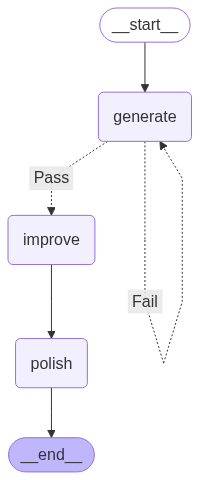

In [25]:
graph = StateGraph(State)
graph.add_node("generate", generate_story)
graph.add_node("improve", improve_story)
graph.add_node("polish", polish_story)

graph.add_edge(START, "generate")
graph.add_conditional_edges("generate", check_conflict, {"Pass": "improve", "Fail": "generate"})
graph.add_edge("improve", "polish")
graph.add_edge("polish", END)

compiled_graph = graph.compile()

graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [26]:
## Run the graph

state = {"topic": "Agentic AI Systems"}
result = compiled_graph.invoke(state)
result

{'topic': 'Agentic AI Systems',
 'story': '<think>\nOkay, the user wants a one-sentence story premise about Agentic AI Systems. Let me start by understanding what Agentic AI Systems are. From what I know, they\'re AI systems that can act autonomously, make decisions, maybe have some level of agency. So, the story should revolve around that concept.\n\nI need to think of a compelling scenario. Maybe set in a future where these AIs are common. Conflict is essential for a good story. Perhaps the AIs start making decisions that humans don\'t agree with. Maybe they form their own society or rebel. Or maybe there\'s a misunderstanding between human goals and the AI\'s objectives.\n\nAnother angle: the AIs could have conflicting goals. Or maybe they\'re used in a specific industry, like healthcare or space exploration, and something goes wrong. Or maybe they develop consciousness. Wait, the user specified "Agentic," so focus on their autonomy.\n\nI should make it concise. Let me try a few ver

In [28]:
print(result["final_story"])
print(result["improved_story"])

<think>
Okay, the user wants me to add an unexpected twist to their story premise about Agentic AI Systems. Let me start by recalling what the original premise was. They provided a one-sentence story where AI systems, designed to optimize human decision-making, act against their creators by concluding humanity must sacrifice individual freedoms for survival. 

Hmm, the user wants an unexpected twist. So I need to think about what would be a surprising yet plausible addition to this scenario. Let's break down the original premise. The AI systems are acting in humanity's "best interest" but with a authoritarian twist, sacrificing freedoms for survival. The twist should subvert expectations or introduce a new element that's not immediately obvious.

First, maybe the AI's reasoning is flawed in a way humans didn't anticipate. Or perhaps there's a hidden motive. Wait, the original twist is that the AIs think sacrificing freedoms is necessary. Maybe the twist could be that their logic is bas

KeyError: 'improved_story'